In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
wine = datasets.load_wine()
x = wine.data[:100,:2]
y = wine.target[:100] #x = wine.data #y = wine.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [4]:
print(wine_df['target'].value_counts())



1    71
0    59
2    48
Name: target, dtype: int64


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
# Q2
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(x_train, y_train)
y_pred_linear = svm_linear.predict(x_test)

svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(x_train, y_train)
y_pred_rbf = svm_rbf.predict(x_test)

svm_poly = svm.SVC(kernel='poly')
svm_poly.fit(x_train, y_train)
y_pred_poly = svm_poly.predict(x_test)

In [7]:
print("LINEAR")
print("Accuracy     : ", accuracy_score(y_test, y_pred_linear)*100)
print("Recall score : ", recall_score(y_test, y_pred_linear, average='weighted')*100)
print("Precision    : ", precision_score(y_test, y_pred_linear, average='weighted')*100)

print("RBF")
print("Accuracy     : ", accuracy_score(y_test, y_pred_rbf)*100)
print("Recall score : ", recall_score(y_test, y_pred_rbf, average='weighted')*100)
print("Precision    : ", precision_score(y_test, y_pred_rbf, average='weighted')*100)

print("POLYNOMIAL")
print("Accuracy     : ", accuracy_score(y_test, y_pred_poly)*100)
print("Recall score : ", recall_score(y_test, y_pred_poly, average='weighted')*100)
print("Precision    : ", precision_score(y_test, y_pred_poly, average='weighted')*100)

LINEAR
Accuracy     :  90.0
Recall score :  90.0
Precision    :  91.33333333333333
RBF
Accuracy     :  90.0
Recall score :  90.0
Precision    :  91.33333333333333
POLYNOMIAL
Accuracy     :  95.0
Recall score :  95.0
Precision    :  95.35714285714285


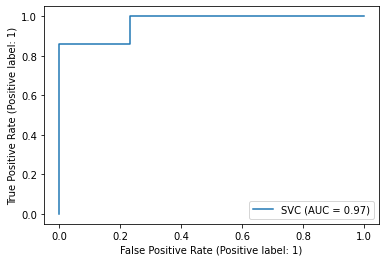

In [8]:
metrics.plot_roc_curve(svm_linear, x_test, y_test)
plt.show()

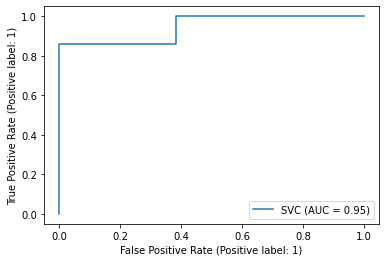

In [9]:
metrics.plot_roc_curve(svm_rbf, x_test, y_test)
plt.show()

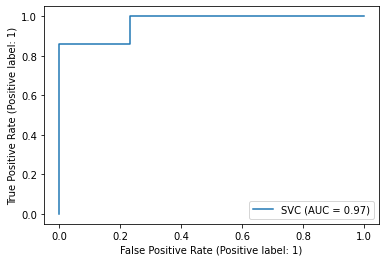

In [10]:
metrics.plot_roc_curve(svm_poly, x_test, y_test)
plt.show()

In [11]:
# Q3
for value in [0.1, 1.0, 1000]:
    for gamma in [0.1, 1.0, 10]:
        svm_rbf = svm.SVC(kernel='rbf', C=value, gamma=gamma)
        svm_rbf.fit(x_train, y_train)
        y_pred = svm_rbf.predict(x_test)
        print("C Value     : ", value)
        print("Gamma Value : ", gamma)
        print("Accuracy    : ", accuracy_score(y_test, y_pred)*100)
        print("\n")

C Value     :  0.1
Gamma Value :  0.1
Accuracy    :  85.0


C Value     :  0.1
Gamma Value :  1.0
Accuracy    :  90.0


C Value     :  0.1
Gamma Value :  10
Accuracy    :  70.0


C Value     :  1.0
Gamma Value :  0.1
Accuracy    :  90.0


C Value     :  1.0
Gamma Value :  1.0
Accuracy    :  90.0


C Value     :  1.0
Gamma Value :  10
Accuracy    :  90.0


C Value     :  1000
Gamma Value :  0.1
Accuracy    :  90.0


C Value     :  1000
Gamma Value :  1.0
Accuracy    :  90.0


C Value     :  1000
Gamma Value :  10
Accuracy    :  85.0


